In [51]:
import time

import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# Directory containing all the phone swing data
folder_containing_sensor_data = './data/'
sensor_parse_interval_ms = 30

## Step 1: Data Loading

This section will load in the sensor data, as well as interpolate the data at a regular interval, which is defined above.

In [53]:
# Organize files that contain the relevant data for each swing type
data = {
    'acc': {
        'Forehand': {
            'Good': {},
            'Bad': {}
        },
        'Backhand': {
            'Good': {},
            'Bad': {}
        },
        'Overhead': {
            'Good': {},
            'Bad': {}
        },
        'Passive': {
            'Good': {

            }
        }
    },
    'bar': {
        'Forehand': {
            'Good': {},
            'Bad': {}
        },
        'Backhand': {
            'Good': {},
            'Bad': {}
        },
        'Overhead': {
            'Good': {},
            'Bad': {}
        },
        'Passive': {
            'Good': {

            }
        }
    }
}

In [54]:
def load_data_file(file_path):
    accel_mode = True
    if 'bar' in file_path:
        accel_mode = False

    loaded_file_data = np.genfromtxt(file_path, dtype='double', delimiter=',')
    loaded_file_data[:, 0] = loaded_file_data[:, 0] - loaded_file_data[0][0]

    new_timestamps = np.arange(0, loaded_file_data[:,0][-1], sensor_parse_interval_ms, dtype='int64')

    # Now, we interpolate the data to be on a common time axis
    if accel_mode:
        new_x = np.interp(x=new_timestamps, xp=loaded_file_data[:,0], fp=loaded_file_data[:,1])
        new_y = np.interp(x=new_timestamps, xp=loaded_file_data[:,0], fp=loaded_file_data[:,2])
        new_z = np.interp(x=new_timestamps, xp=loaded_file_data[:,0], fp=loaded_file_data[:,3])
        aligned_data = np.column_stack((new_timestamps, new_x, new_y, new_z))

    else:
        new_bar = np.interp(x=new_timestamps, xp=loaded_file_data[:,0], fp=loaded_file_data[:,1])
        aligned_data = np.column_stack((new_timestamps, new_bar))

    return aligned_data

In [55]:
all_data_files = glob.glob(os.path.join(folder_containing_sensor_data, '*'))

start_time = time.time()
for data_file in all_data_files:
    swing_success = 'Good'
    data_file_name_only = data_file.split('/')[-1][:-4]
    data_file_name_only = data_file_name_only.split('\\')[1]
    method, swing_type, timestamp = data_file_name_only.split('_')[:3]

    # Mark as bad if necessary
    if len(data_file_name_only.split('_')) >= 4:
        swing_success = 'Bad'

    data[method][swing_type][swing_success][timestamp] = load_data_file(data_file)
end_time = time.time()

print(f"Loaded Data from {len(all_data_files)//2} Swings in {(end_time-start_time):.2f} Seconds")

Loaded Data from 534 Swings in 1.03 Seconds


## Step 2: Visualize the data

Now that the data has been recorded, it is time to create the classifier.

### Show the raw data of accelerometer

In [56]:
# This prints out one swing acc data, first is time, x, y, z
print(data['acc']['Backhand']['Good']['1650304011612'][0])


[ 0.          1.0097656  -0.89730835  9.944565  ]


### Show what the x, y, z looks like for swings

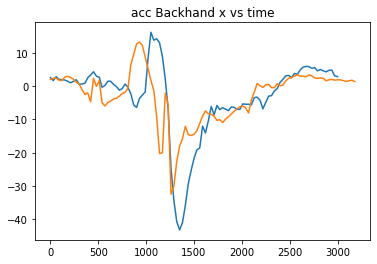

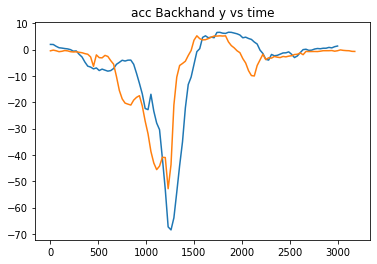

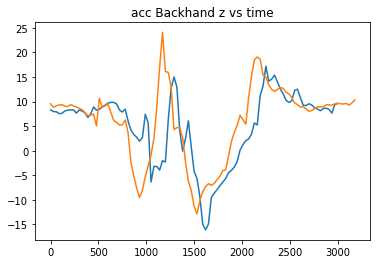

In [57]:
# change num_data to change number of graphs
num_data = 2
sensor = 'acc'
swing = 'Backhand'
isGood = 'Good'

time_stamps = [key for key, value in data[sensor][swing][isGood].items()]
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    x = [t_stamp[1] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(0)
    plt.plot(time, x)
    plt.title(sensor + " " + swing + " " + "x vs time")

for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    y = [t_stamp[2] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(1)
    plt.plot(time, y)
    plt.title(sensor + " " + swing + " " + "y vs time")
    
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    z = [t_stamp[3] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(2)
    plt.plot(time, z)
    plt.title(sensor + " " + swing + " " + "z vs time")

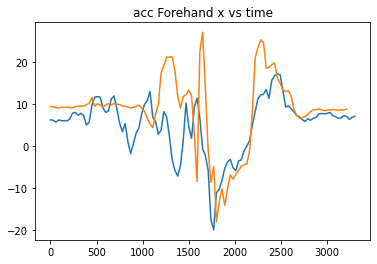

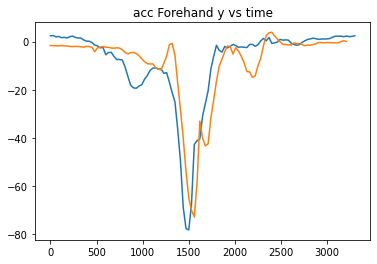

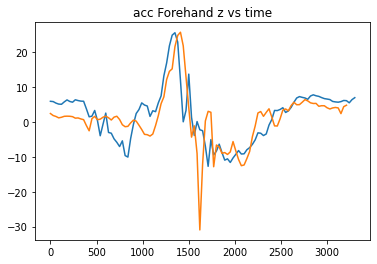

In [58]:
# change num_data to change number of graphs
num_data = 2
sensor = 'acc'
swing = 'Forehand'
isGood = 'Good'

time_stamps = [key for key, value in data[sensor][swing][isGood].items()]
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    x = [t_stamp[1] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(0)
    plt.plot(time, x)
    plt.title(sensor + " " + swing + " " + "x vs time")

for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    y = [t_stamp[2] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(1)
    plt.plot(time, y)
    plt.title(sensor + " " + swing + " " + "y vs time")
    
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    z = [t_stamp[3] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(2)
    plt.plot(time, z)
    plt.title(sensor + " " + swing + " " + "z vs time")

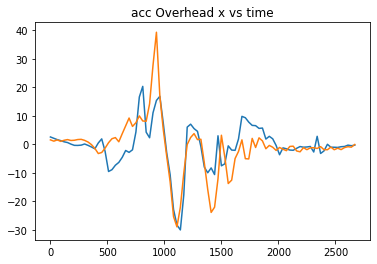

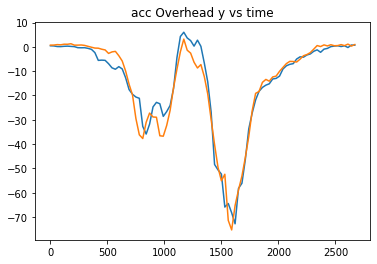

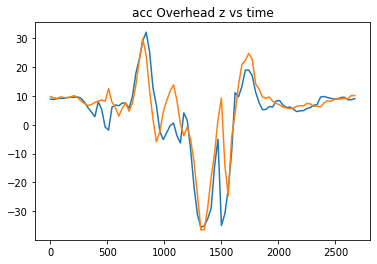

In [59]:
# change num_data to change number of graphs
num_data = 2
sensor = 'acc'
swing = 'Overhead'
isGood = 'Good'

time_stamps = [key for key, value in data[sensor][swing][isGood].items()]
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    x = [t_stamp[1] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(0)
    plt.plot(time, x)
    plt.title(sensor + " " + swing + " " + "x vs time")

for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    y = [t_stamp[2] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(1)
    plt.plot(time, y)
    plt.title(sensor + " " + swing + " " + "y vs time")
    
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    z = [t_stamp[3] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(2)
    plt.plot(time, z)
    plt.title(sensor + " " + swing + " " + "z vs time")

### Show the barometer data for different swings

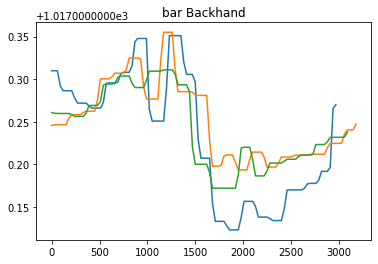

In [60]:
# change num_data to change number of graphs
num_data = 3
sensor = 'bar'
swing = 'Backhand'
isGood = 'Good'

time_stamps = [key for key, value in data[sensor][swing][isGood].items()]
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    x = [t_stamp[1] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(0)
    plt.plot(time, x)
    plt.title(sensor + " " + swing)


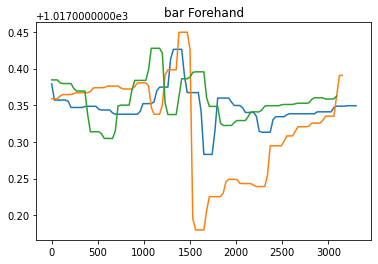

In [61]:
# change num_data to change number of graphs
num_data = 3
sensor = 'bar'
swing = 'Forehand'
isGood = 'Good'

time_stamps = [key for key, value in data[sensor][swing][isGood].items()]
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    x = [t_stamp[1] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(0)
    plt.plot(time, x)
    plt.title(sensor + " " + swing)


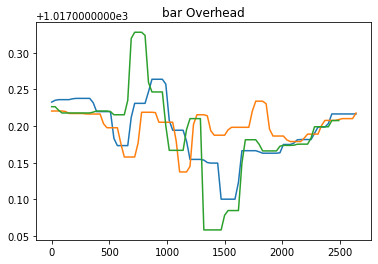

In [62]:
# change num_data to change number of graphs
num_data = 3
sensor = 'bar'
swing = 'Overhead'
isGood = 'Good'

time_stamps = [key for key, value in data[sensor][swing][isGood].items()]
for i in range(num_data):
    time = [t_stamp[0] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    x = [t_stamp[1] for t_stamp in data[sensor][swing][isGood][time_stamps[i]]]
    plt.figure(0)
    plt.plot(time, x)
    plt.title(sensor + " " + swing)


### Show acc & bar magnitude data

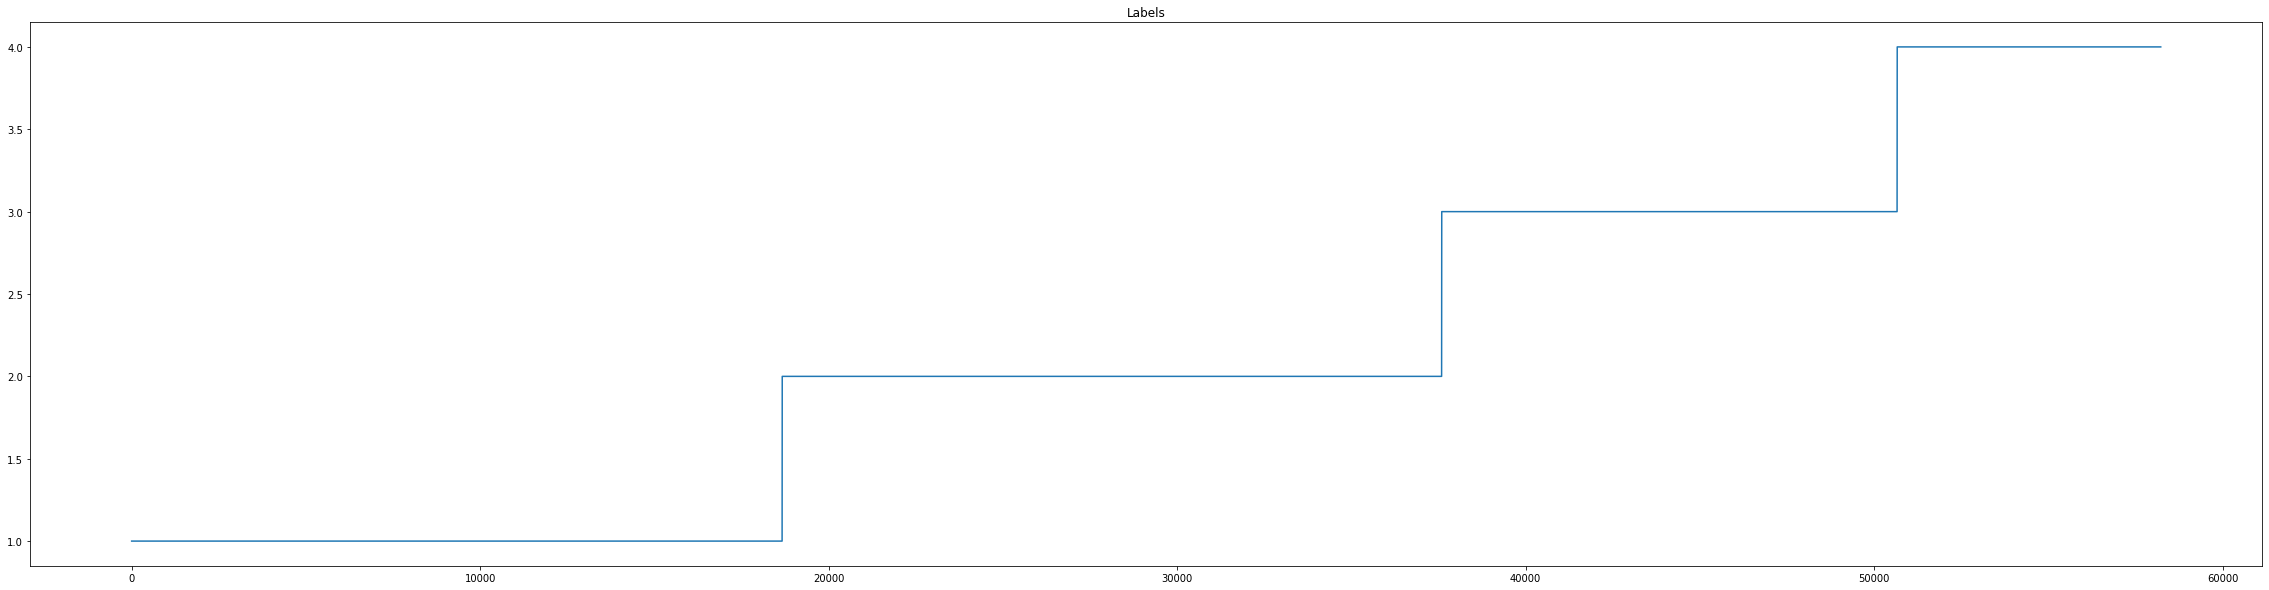

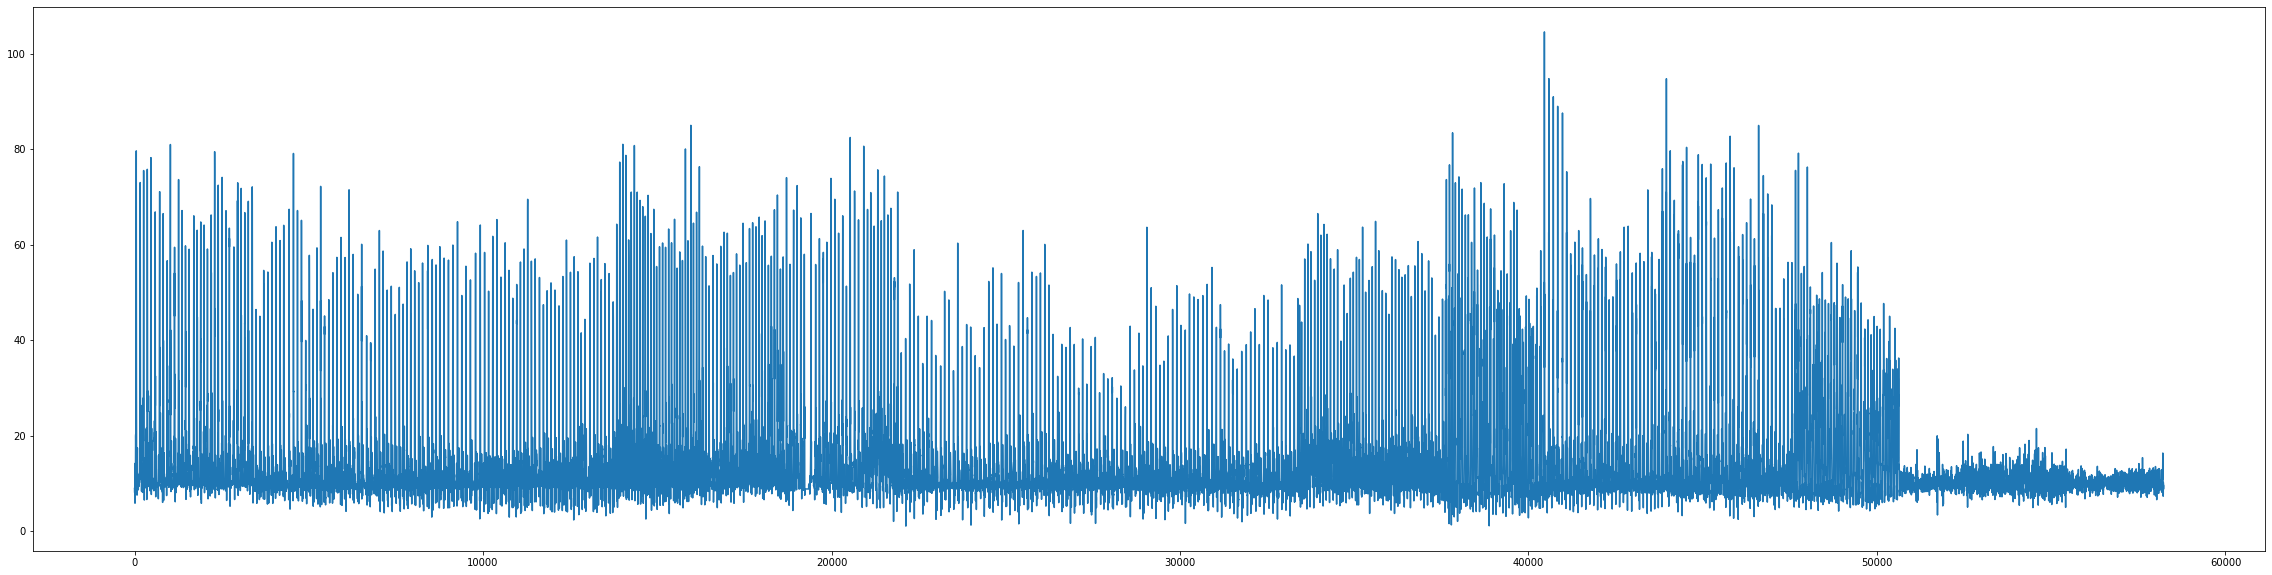

In [63]:
# Visualize the magnitude of the 3D accelerometer values
import math

sensor = 'acc'
swings = ['Forehand', 'Backhand', 'Overhead', 'Passive']
isGood = 'Good'
# forehand label 1, backhand label 2, overhead label 3, passive label 4
activity_label_acc = []
activity_label_bar = []
acc_mag = []
bar_mag = []

for idx, swing in enumerate(swings):
    for key, value in data[sensor][swing][isGood].items():
        for acc_data in value:
            acc_mag.append( math.sqrt(acc_data[1]**2 + acc_data[2]**2 + acc_data[3]**2) )
            activity_label_acc.append(idx+1)
        for bar_data in data['bar'][swing][isGood][key]:
            bar_mag.append(bar_data[1])
            activity_label_bar.append(idx+1)


plt.figure(0, figsize=(40,10))
plt.plot(list(range(len(activity_label_acc))), activity_label_acc)
plt.title("Labels")


plt.figure(1, figsize=(40,10))
plt.plot(list(range(len(activity_label_acc))), acc_mag)



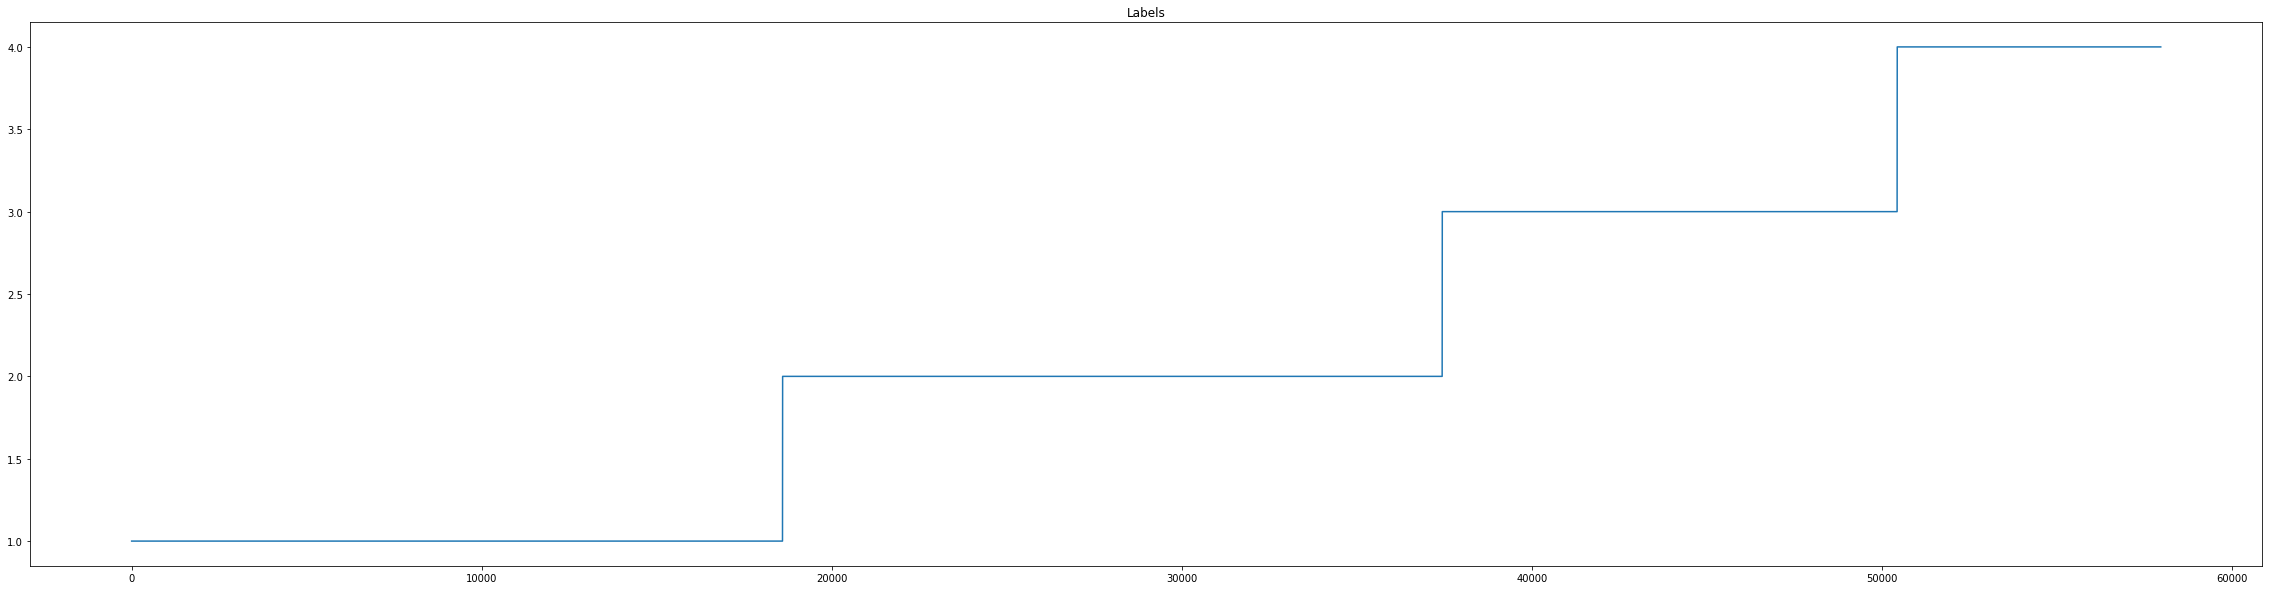

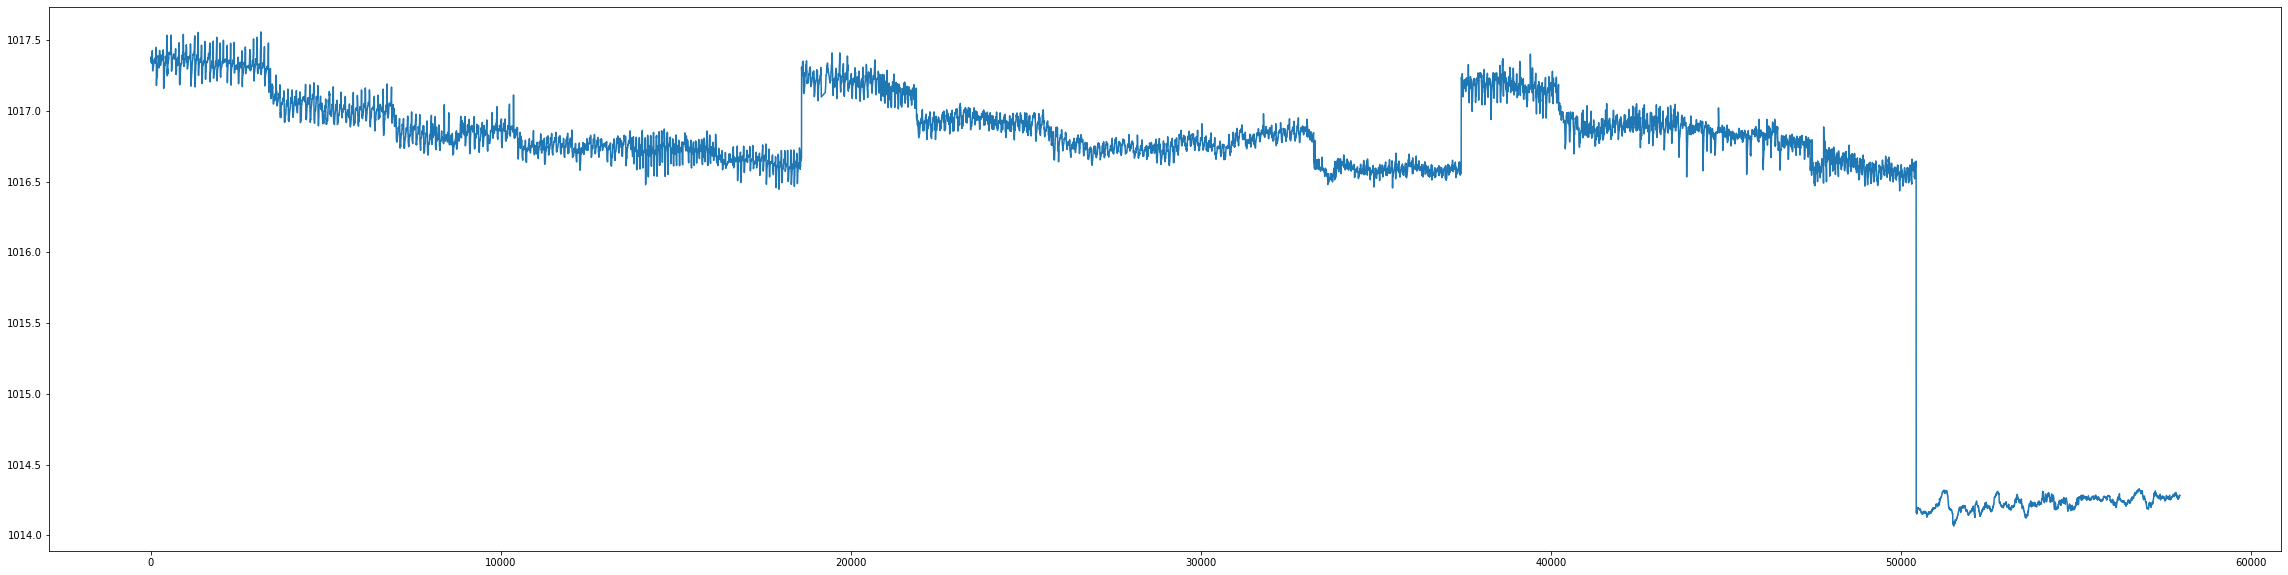

In [64]:
plt.figure(0, figsize=(40,10))
plt.plot(list(range(len(activity_label_bar))), activity_label_bar)
plt.title("Labels")

plt.figure(1, figsize=(40,10))
plt.plot(list(range(len(activity_label_bar))), bar_mag)

58227
1650303738074
1200.0
1800.0
0.0
3300.0
111


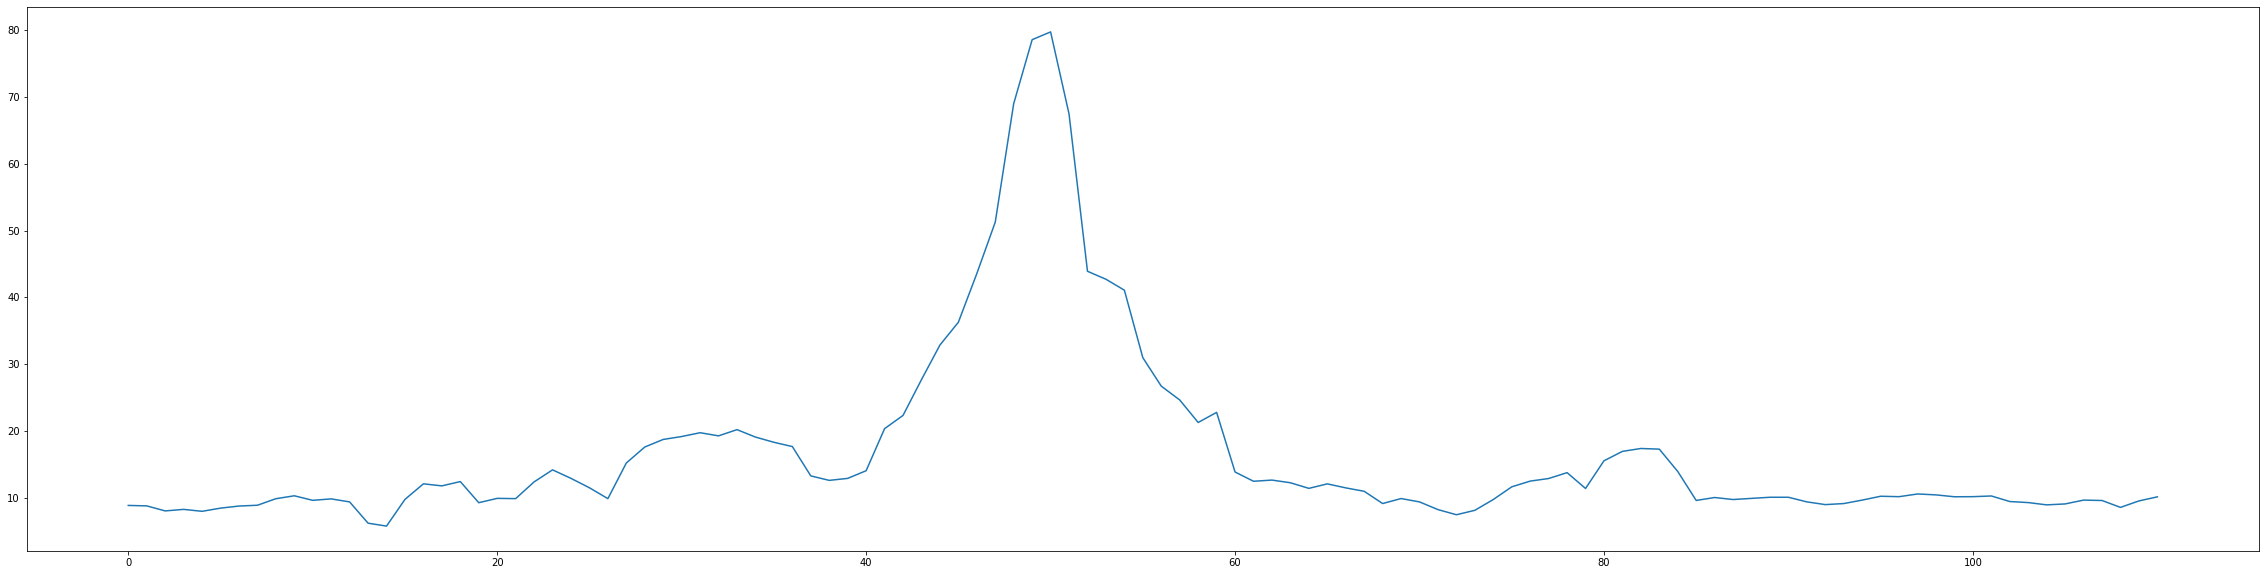

In [65]:
print(len(acc_mag))
print(next(iter(data['acc']['Forehand']['Good'])))
print(data['acc']['Forehand']['Good']['1650303738074'][40][0])
print(data['acc']['Forehand']['Good']['1650303738074'][60][0])
print(data['acc']['Forehand']['Good']['1650303738074'][0][0])
print(data['acc']['Forehand']['Good']['1650303738074'][-1][0])
print(len(data['acc']['Forehand']['Good']['1650303738074']))
temp = len(data['acc']['Forehand']['Good']['1650303738074'])
plt.figure(0, figsize=(40,10))
plt.plot(list(range(temp)), acc_mag[0:temp])


## Windowing & feature engineering

In [66]:
import numpy as np

sensor = 'acc'
swings = ['Forehand', 'Backhand', 'Overhead', 'Passive']
isGood = 'Good'
# forehand label 1, backhand label 2, overhead label 3, passive label 4
activity_label_acc = []
featureMatrix = []


for idx, swing in enumerate(swings):
    for key, value in data[sensor][swing][isGood].items():
        # value is [ [], []] includes each timestamp data
        x = []
        y = []
        z = []
        mag = []
        
        # Get data for each swing
        for acc_data in value:
            mag.append( math.sqrt(acc_data[1]**2 + acc_data[2]**2 + acc_data[3]**2) )
            x.append(acc_data[1])
            y.append(acc_data[2])
            z.append(acc_data[3])
            
        # build the feature matrix row
        activity_label_acc.append(swing)
        featureVector = []
        
        # mean of x,y,z,mag
        featureVector.append(np.mean(x))
        featureVector.append(np.mean(y))
        featureVector.append(np.mean(z))
        featureVector.append(np.mean(mag))
        
#         # peak value
#         featureVector.append(np.max(x))
#         featureVector.append(np.max(y))
#         featureVector.append(np.max(z))
#         featureVector.append(np.max(mag))
        
        # std 
        featureVector.append(np.std(x))
        featureVector.append(np.std(y))
        featureVector.append(np.std(z))
        featureVector.append(np.std(mag))
        # Other features
        
        featureMatrix.append(featureVector)



In [67]:
# forehand label 1, backhand label 2, overhead label 3, passive label 4
# print(np.std([1,2,3]))
print(len(activity_label_acc))
print(len(featureMatrix))

534
534


## Split train and test

In [68]:
import random

temp = list(zip(featureMatrix, activity_label_acc))
random.shuffle(temp)
featureMatrix, activity_label_acc = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
featureMatrix, activity_label_acc = list(featureMatrix), list(activity_label_acc)

# 80-20 split
split_idx = int(len(activity_label_acc)*0.8)
train_x = featureMatrix[0:split_idx]
train_y = activity_label_acc[0:split_idx]

test_x = featureMatrix[split_idx : len(activity_label_acc)]
test_y = activity_label_acc[split_idx : len(activity_label_acc)]
                        

## Train & Test model

In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_x, train_y)


KNeighborsClassifier(n_neighbors=7)

In [70]:
model.score(test_x, test_y)

0.9532710280373832

(array([22.,  0.,  0., 31.,  0.,  0., 44.,  0.,  0., 10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

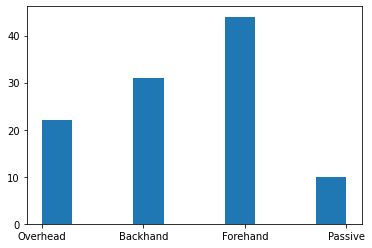

In [71]:
plt.hist(test_y)

In [72]:
false_count = {
     'Forehand': 0,
    'Backhand': 0,
    'Overhead': 0,
    'Passive': 0
}

correct_count = {
     'Forehand': 0,
    'Backhand': 0,
    'Overhead': 0,
    'Passive': 0
}

for i in range(len(test_x)):
    predict_label = model.predict([test_x[i]])
    if predict_label != test_y[i]:
        false_count[test_y[i]] += 1
    else:
        correct_count[test_y[i]]+=1

print('Model predict incorrect counts:')
for item in false_count.items():
    print(item)

print('Model predict correct counts:')
for item in correct_count.items():
    print(item)

Model predict incorrect counts:
('Forehand', 4)
('Backhand', 1)
('Overhead', 0)
('Passive', 0)
Model predict correct counts:
('Forehand', 40)
('Backhand', 30)
('Overhead', 22)
('Passive', 10)


In [73]:
# TODO make sure direction won't matter, otherwise use abs for x and z


### Export model

In [74]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

## KNN in pytorch and export

In [75]:
import torch
# https://github.com/Kulbear/pytorch-the-hard-way/blob/master/Solutions/Nearest%20Neighbor.ipynb

In [129]:
class KNearestNeighbor(torch.nn.Module):
    def __init__(self, x, y, k):
        super(KNearestNeighbor, self).__init__()
        self.xtr = x
        self.ytr = y
        self.k = k


    def forward(self, X, distance='L1'):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            if distance == 'L1':
                distances = np.sum(np.abs(self.xtr - X[i,:]), axis=1)
            # using the L2 distance (sum of absolute value differences)
            if distance == 'L2':
                distances = np.sqrt(np.sum(np.square(self.xtr - X[i,:]), axis=1))
            temp = []
            max_value = np.amax(distances)
            for j in range(self.k): #find three closest data
                min_index = np.argmin(distances)# get the index with smallest distance
                temp.append(self.ytr[min_index])# predict the label of the nearest example
                distances[min_index] = max_value# set the current smallest value to max value
            Ypred[i] = max(set(temp), key = temp.count)# find the most frequent prediction
        return Ypred

In [130]:
nn = KNearestNeighbor(np.array(train_x), np.array(train_y),10)
y_test_pred = nn.forward(np.array(test_x))
print('accuracy: %f' % (np.mean(y_test_pred == test_y)))

accuracy: 0.953271


In [131]:
# Save the model
torch.save(nn, 'knn_tennis_model_scripted.pt') # Save
# torch.save(nn.state_dict(),'knn_tennis_model_scripted.pt')

In [136]:
model = torch.load('knn_tennis_model_scripted.pt')
model.eval()
prediction = model(np.array(test_x))
print('accuracy: %f' % (np.mean(prediction == test_y)))
# traced_script_module_optimized = optimize_for_mobile(traced_script_module)
# traced_script_module_optimized._save_for_lite_interpreter("app/src/main/assets/model.ptl")

accuracy: 0.953271
